In [88]:
import os
from tensorflow.keras.models import load_model
import numpy as np
from PIL import Image
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

In [42]:
model = load_model('model_1.1.h5')

In [52]:
def check(y):
    global y_pred, y_true, model
    for i in os.listdir():
        img = Image.open(i)
        img = img.convert('RGB')
        img = img.resize((200, 200))
        arr = np.asarray(img, dtype='uint8')
        k = np.array([[[0.2989, 0.587, 0.114]]])
        sums = np.round(np.sum(arr*k, axis=2)).astype(np.uint8)
        sums = sums.reshape((1, 40000))
        sums = sums.reshape(1, 200, 200)
        y_pred = np.append(y_pred, model.predict(sums)[0][0])
        y_true = np.append(y_true, y)
        
y_pred = np.array([])
y_true = np.array([])
os.chdir('test_false_hard')
check(0)
os.chdir('..')
os.chdir('test_false_easy')
check(0)
os.chdir('..')
os.chdir('test_true')
check(1)
os.chdir('..')

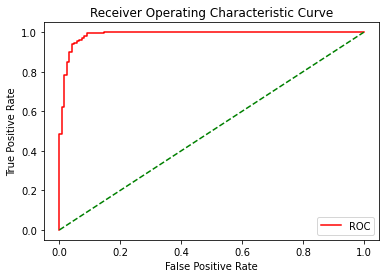

In [95]:
fper, tper, thresholds = metrics.roc_curve(y_true, y_pred)
plt.plot(fper, tper, color='red', label='ROC')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend()
plt.show()

In [96]:
metrics.roc_auc_score(y_true, y_pred)

0.9865914905714015